<a href="https://colab.research.google.com/github/rutujas11/Machine-Learning-Models/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [ ]:
housing_df = pd.DataFrame(data = housing.data,columns = housing.feature_names)
housing_df['HousePrice'] = housing.target

housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,HousePrice
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
housing_df.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
HousePrice    0
dtype: int64

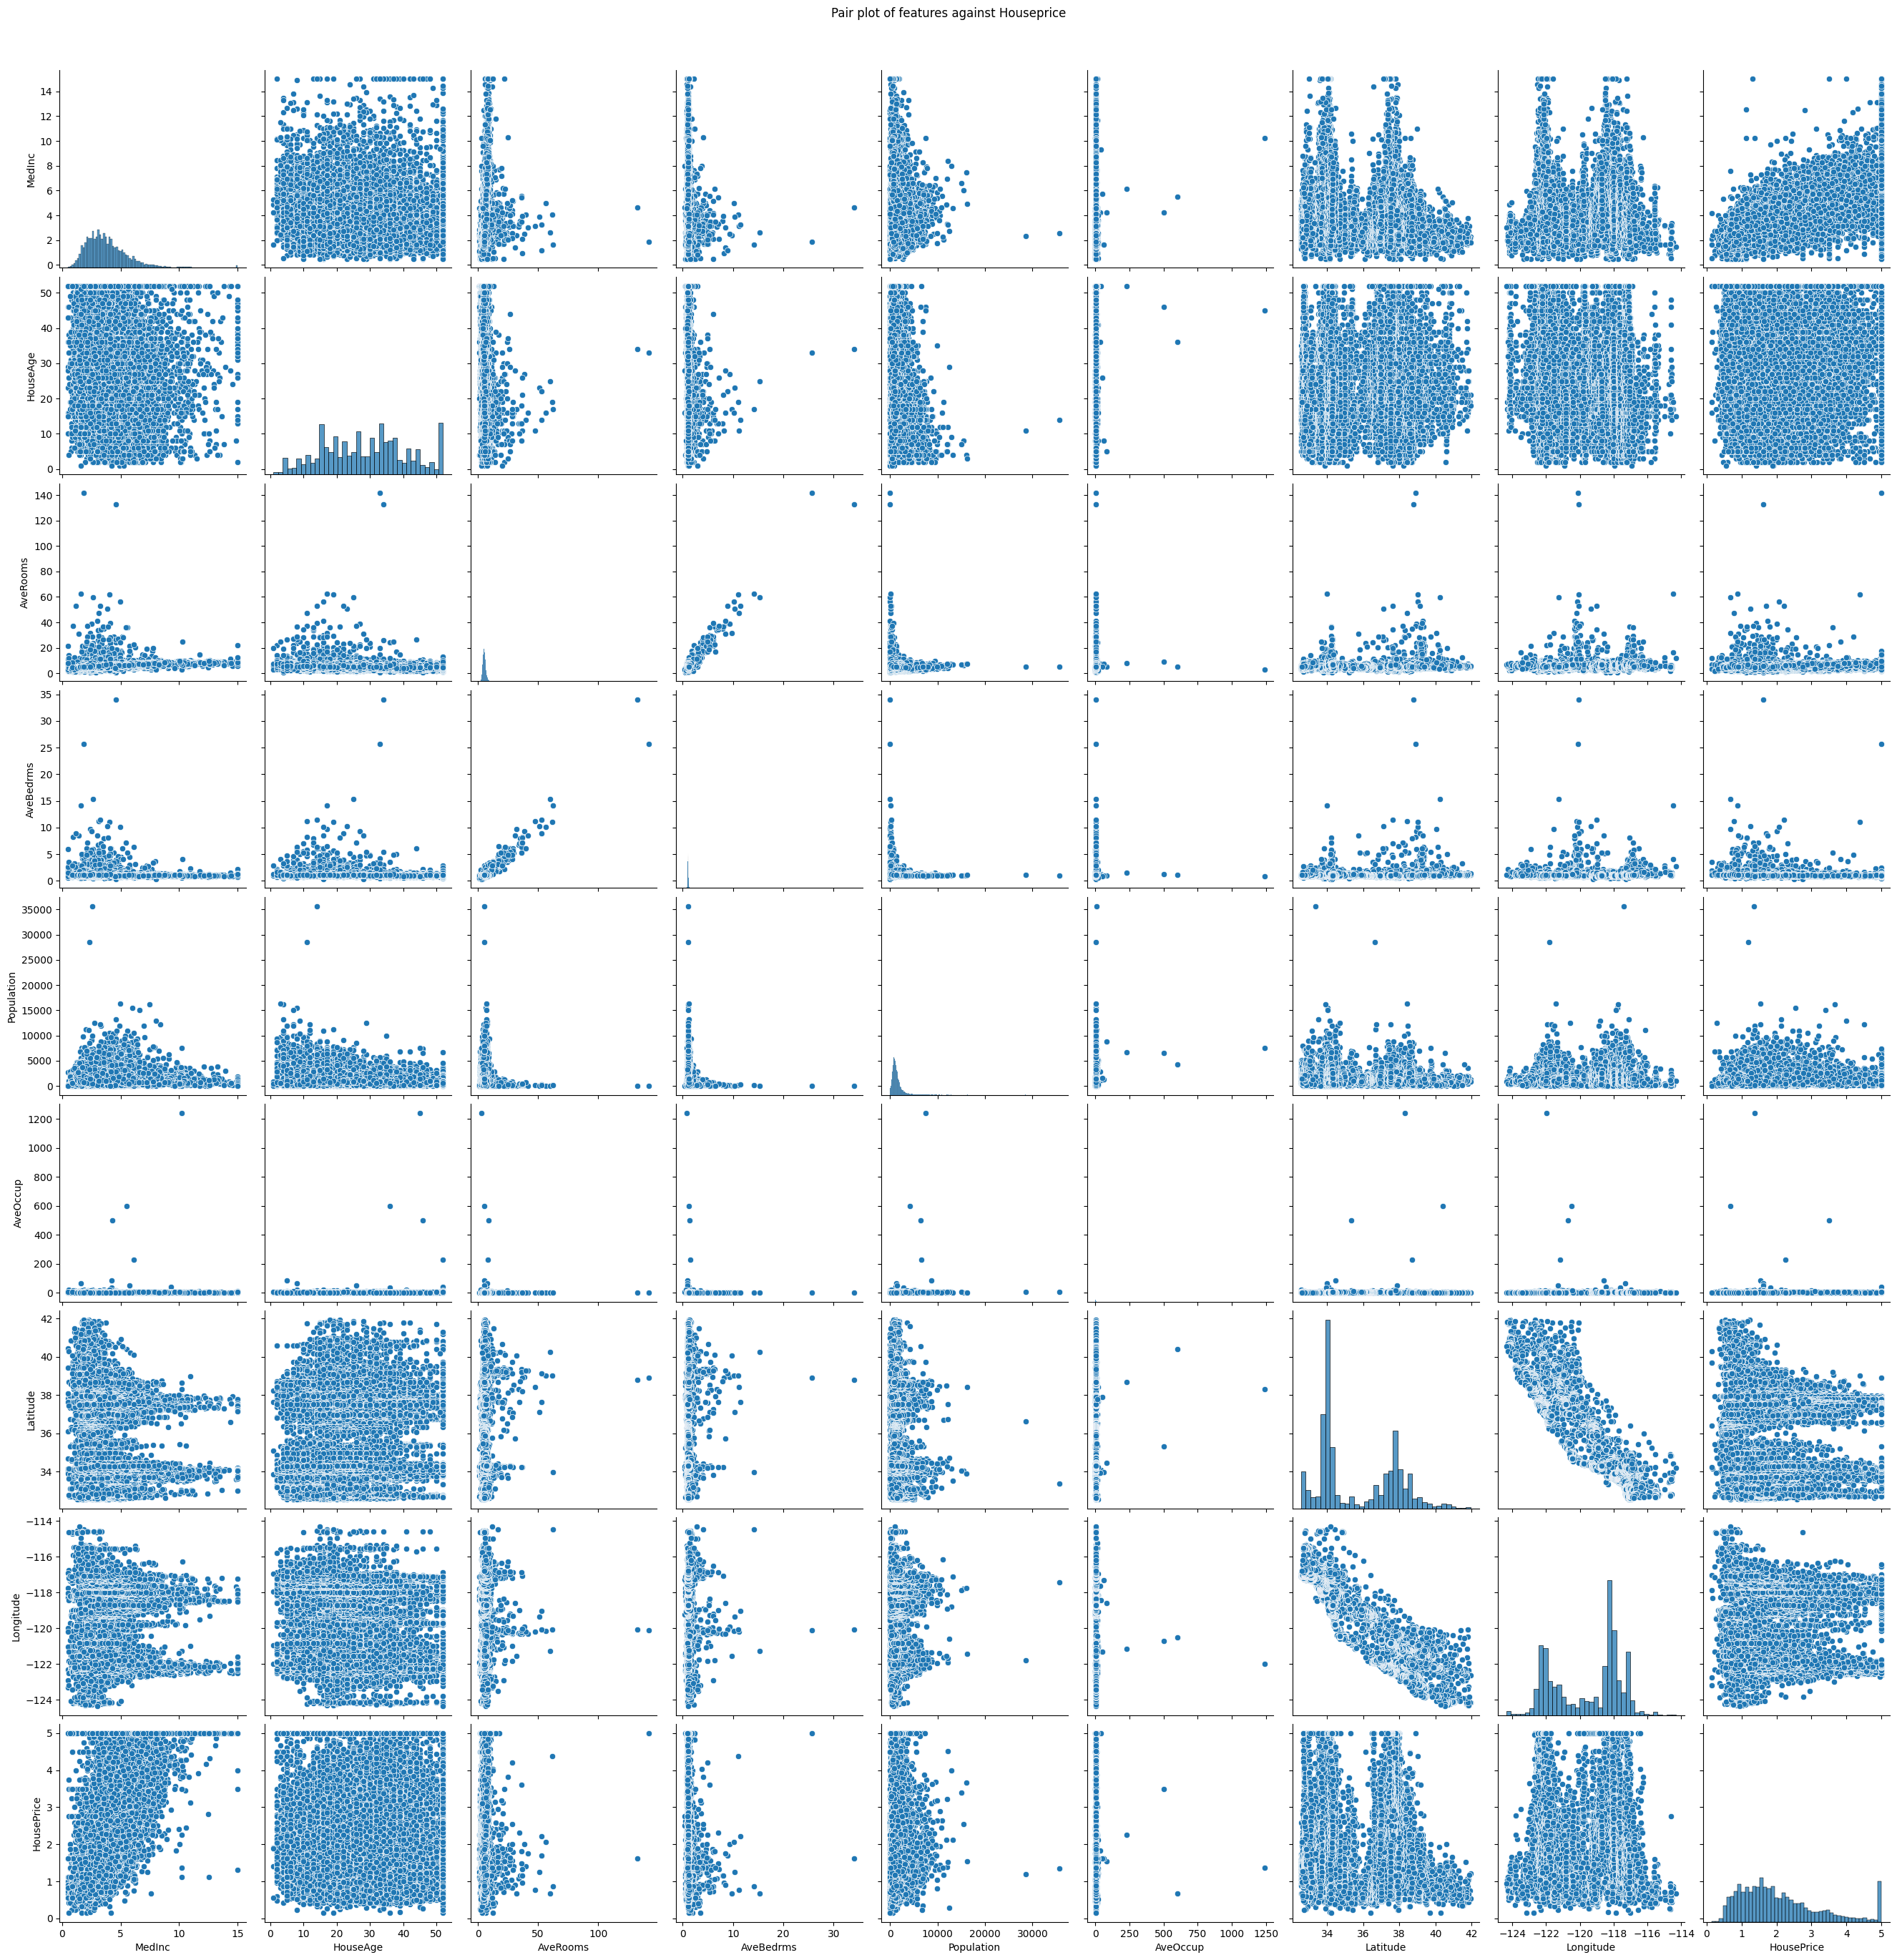

In [ ]:
sns.pairplot(housing_df, height = 3)
plt.suptitle('Pair plot of features against Houseprice', y=1.02)
plt.show()

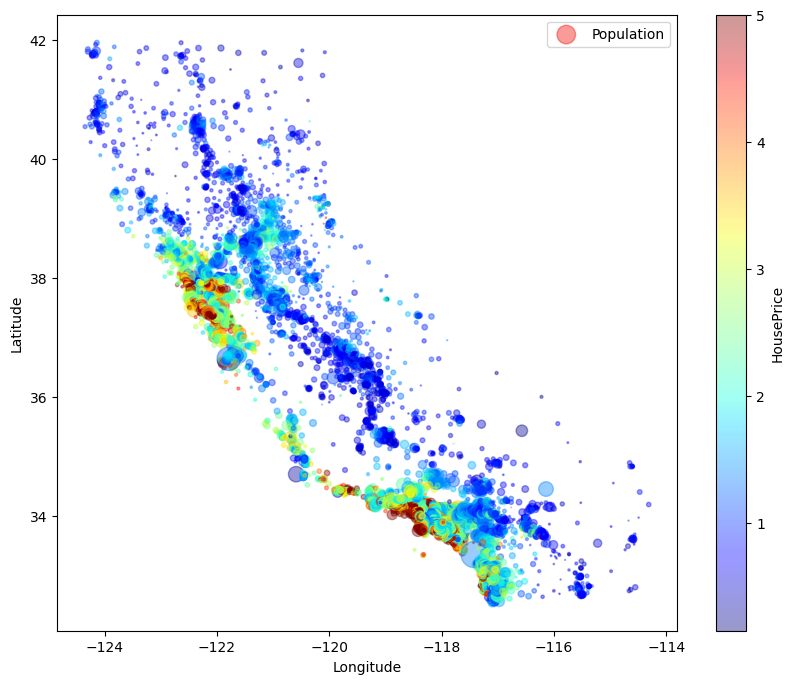

In [ ]:
housing_df.plot(
    kind = 'scatter',
    x = 'Longitude',
    y = 'Latitude',
    alpha= 0.4,
    s = housing_df['Population']/100,
    label = 'Population',
    c = 'HousePrice',
    cmap = 'jet',
    colorbar = True,
    figsize = (10,8)
)
plt.show()

<Axes: >

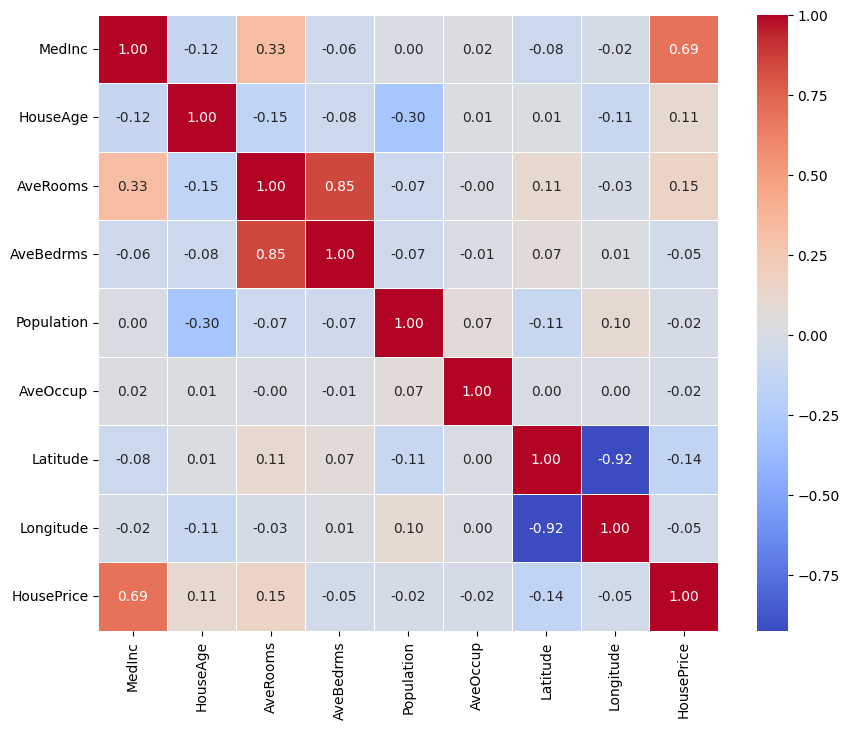

In [ ]:
corr = housing_df.corr()
plt.figure(figsize = (10,8))

sns.heatmap(corr, annot = True, cmap='coolwarm', fmt = '.2f', linewidth = 0.5)

In [ ]:
corr['HousePrice'].abs().sort_values(ascending = False)

HousePrice    1.000000
MedInc        0.688075
AveRooms      0.151948
Latitude      0.144160
HouseAge      0.105623
AveBedrms     0.046701
Longitude     0.045967
Population    0.024650
AveOccup      0.023737
Name: HousePrice, dtype: float64

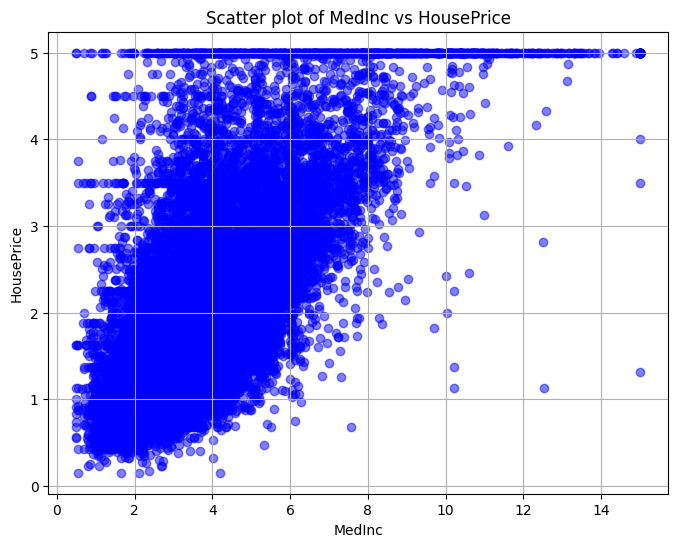

In [ ]:
medin = housing_df['MedInc']
houseprice = housing_df['HousePrice']

plt.figure(figsize = (8,6))
plt.scatter(medin,houseprice, alpha = 0.5, color = 'blue')
plt.title('Scatter plot of MedInc vs HousePrice')
plt.xlabel('MedInc')
plt.ylabel('HousePrice')
plt.grid(True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

housing_df_vif = housing_df.drop('HousePrice', axis = 1)
housing_df_vif = housing_df_vif.apply(pd.to_numeric,errors= 'coerce')

vif_data =  pd.DataFrame()
vif_data['Feature'] = housing_df_vif.columns
vif_data['VIf'] = [variance_inflation_factor(housing_df_vif.values,i) for i in range(len(housing_df_vif.columns))]
print(vif_data)


      Feature         VIf
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


In [ ]:
housing_df = housing_df.drop(['Latitude','Longitude'], axis = 1)

In [ ]:
cols_to_conv= ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df[cols_to_conv] = housing_df[cols_to_conv].apply(pd.to_numeric, errors = 'coerce')
housing_df['HousePrice'] = pd.to_numeric(housing_df['HousePrice'],errors = 'coerce')

x = sm.add_constant(housing_df.drop('HousePrice', axis = 1))
y =housing_df['HousePrice']

model = sm.OLS(y,x).fit()

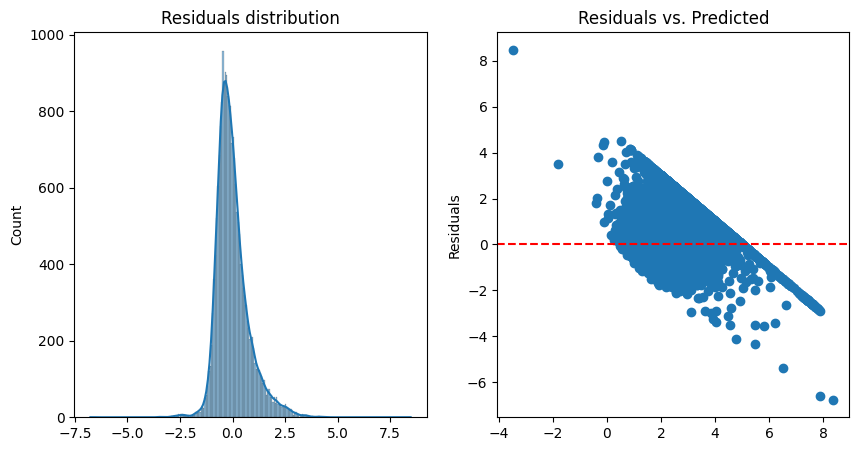

Model coefficients:
 const        -0.439093
MedInc        0.536910
HouseAge      0.016503
AveRooms     -0.211740
AveBedrms     0.993730
Population    0.000022
AveOccup     -0.004877
dtype: float64


In [ ]:
residuals = model.resid

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde = True)
plt.title('Residuals distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(x), residuals)
plt.axhline(y=0, color = 'red', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.ylabel('Residuals')
plt.show()

print('Model coefficients:\n',model.params)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x)

print('R Square Score:', r2_score(y,predictions))
print("MSE:", mean_squared_error(y,predictions))

R Square Score: 0.5396977345638283
MSF: 0.6129156196698703


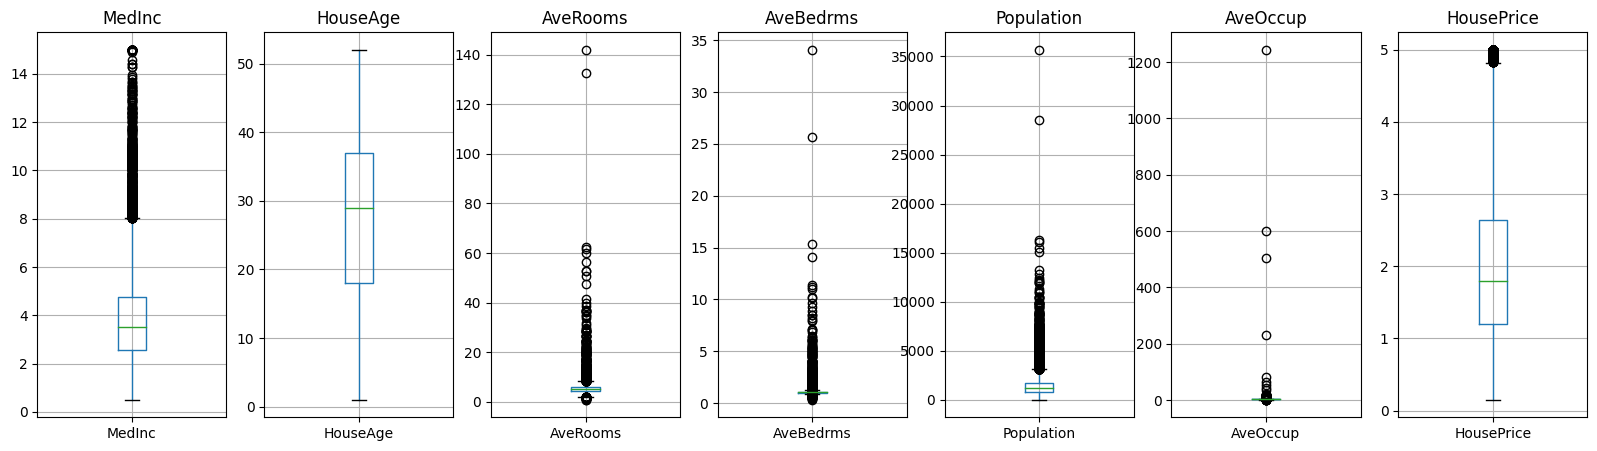

In [ ]:
import matplotlib.pyplot as plt

def plot_boxplot(df):
  fig, axes = plt.subplots(1, len(df.columns), figsize = (20,5))

  for i ,column_name in enumerate(df.columns):
    df.boxplot(column = column_name, ax = axes[i])
    axes[i].set_title(column_name)

  plt.show()

plot_boxplot(df=housing_df)

In [ ]:
def remove_outliers(df):
  df_no_outliers = df.copy()

  for column_name in df.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR

    df_no_outliers[column_name] = df_no_outliers[column_name].apply(lambda x: lower_bound if x < lower_bound
                                                                    else upper_bound if x > upper_bound else x)
  return df_no_outliers

housing_df_new = remove_outliers(housing_df)

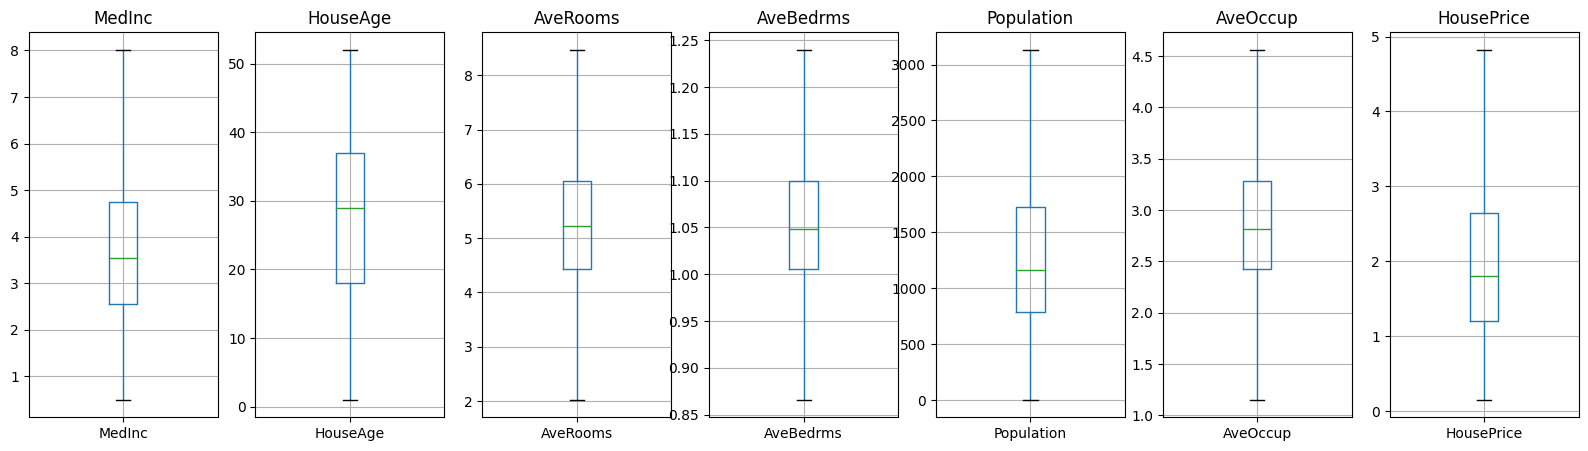

In [ ]:
plot_boxplot(housing_df_new)

In [ ]:
cols_to_conv= ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup']
housing_df_new[cols_to_conv] = housing_df_new[cols_to_conv].apply(pd.to_numeric, errors = 'coerce')
housing_df_new['HousePrice'] = pd.to_numeric(housing_df_new['HousePrice'],errors = 'coerce')

x = sm.add_constant(housing_df_new.drop('HousePrice', axis = 1))
y =housing_df_new['HousePrice']

model = sm.OLS(y,x).fit()

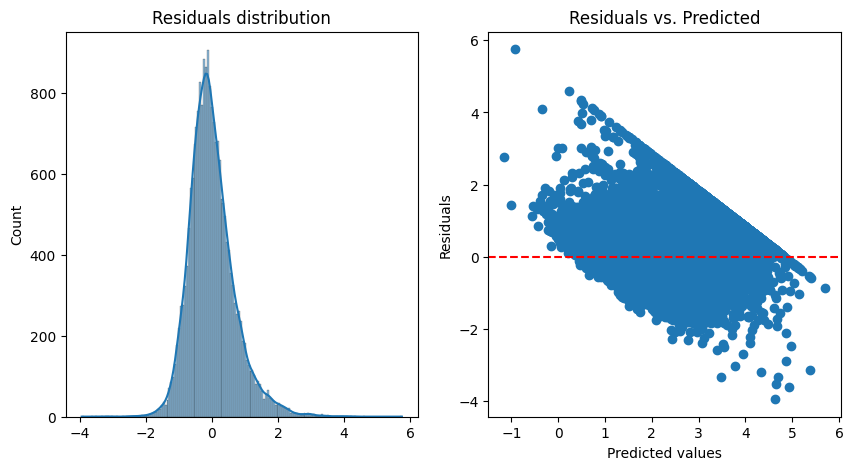

Model coefficients : 
 const        -1.025744
MedInc        0.634138
HouseAge      0.018696
AveRooms     -0.258632
AveBedrms     2.308808
Population    0.000079
AveOccup     -0.357348
dtype: float64


In [ ]:
residuals = model.resid

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.histplot(residuals, kde = True)
plt.title('Residuals distribution')

plt.subplot(1,2,2)
plt.scatter(model.predict(x),residuals)
plt.axhline(y=0,color = 'red', linestyle = '--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()

print("Model coefficients : \n",model.params)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

predictions = model.predict(x)

print('R Square Score:', r2_score(y,predictions))
print("MSE:", mean_squared_error(y,predictions))

R Square Score: 0.617696810976802
MSE: 0.49001892235770017
